In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

###  "nowYouDont.png" 

In [2]:
img = cv2.imread('nowYouDont.png',1)
cv2.imshow('original',img)

h, w = img.shape[:2]
for i in range(h):
    for j in range(w):
        if(img[i][j][2] != 145):
            img[i][j][2] = 0

cv2.imshow('Write',img)
cv2.waitKey()
cv2.destroyAllWindows()

## Frequency 

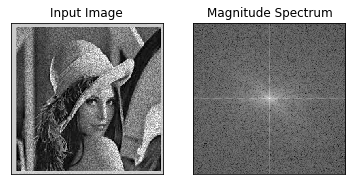

In [5]:
 img = cv2.imread('noise.jpg',0)
cv2.imshow("Noise1",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()       
  

224 225


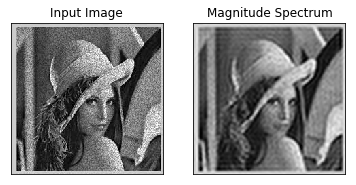

In [4]:
rows, cols = img.shape
crow, ccol = rows/2 , cols/2     # center
print(rows,cols)
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
mask[int(crow)-30:int(crow)+30, int(ccol)-30:int(ccol)+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()                

### Sun

In [6]:
img  = cv2.imread('Sun.jpg',0)
h,w = img.shape[:2]
t = 250
flag1 = 0
flag2 = 0
kernel = np.ones((5,5),np.uint8)
cv2.imshow("SUN",img)
retval, th = cv2.threshold(img, t, 255, cv2.THRESH_BINARY)
erosion = cv2.erode(th,kernel,iterations = 1)
dilation = cv2.dilate(erosion,kernel,iterations = 1)
cv2.imshow("Position",dilation)
cv2.waitKey()
cv2.destroyAllWindows()